In [1]:
import DualNetM as dm
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

In [3]:
prior_network = dm.datasets.load_human_prior_network()

In [4]:
adata=sc.read_csv('/home/dbj/cancer/top3000expressT.csv')
Prior_marker=pd.read_csv('/home/dbj/cancer/marker333.csv')
output_file='/home/dbj/DualNetM-main/cancer/'

In [5]:
data = dm.data_preparation(adata, prior_network)

Data loading and preprocessing....
The species is human
Consider the input data with 1lineages:
Lineage-all:
    74437 extra edges (Spearman correlation > 0) are added into the prior network.
    Total number of edges: 151828.
 n_genes x n_cells =2813 x 4645


In [33]:
DualNetM_GRN_model = dm.NetModel(epochs=340, cuda='0', seed=9)
DualNetM_GRN_model.run(data)

  Iter: 1/1: 100%|███████████████| 340/340 [00:22<00:00, 14.81it/s, loss=0.00546, min_loss=0.000557]


In [34]:
DualNetMResult=DualNetM_GRN_model.get_DualNetM_results(Prior_marker=Prior_marker)

In [35]:
coexpress,result=DualNetMResult.find_marker(output_file=output_file)

In [1]:
result['melanoma']

NameError: name 'result' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

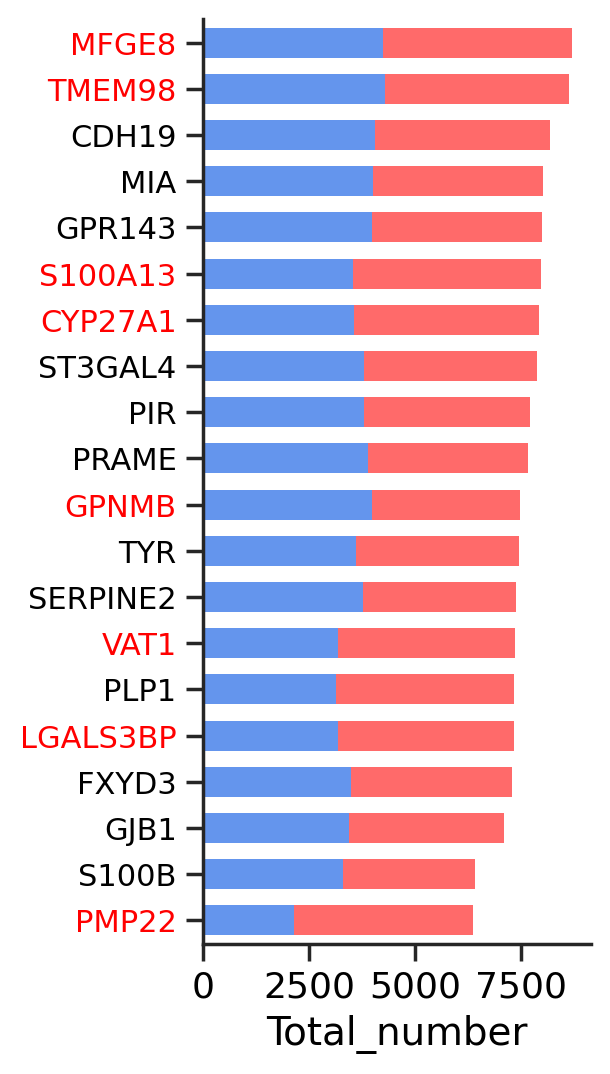

In [36]:
DualNetMResult.plot_candidate_marker('melanoma',topK=20)

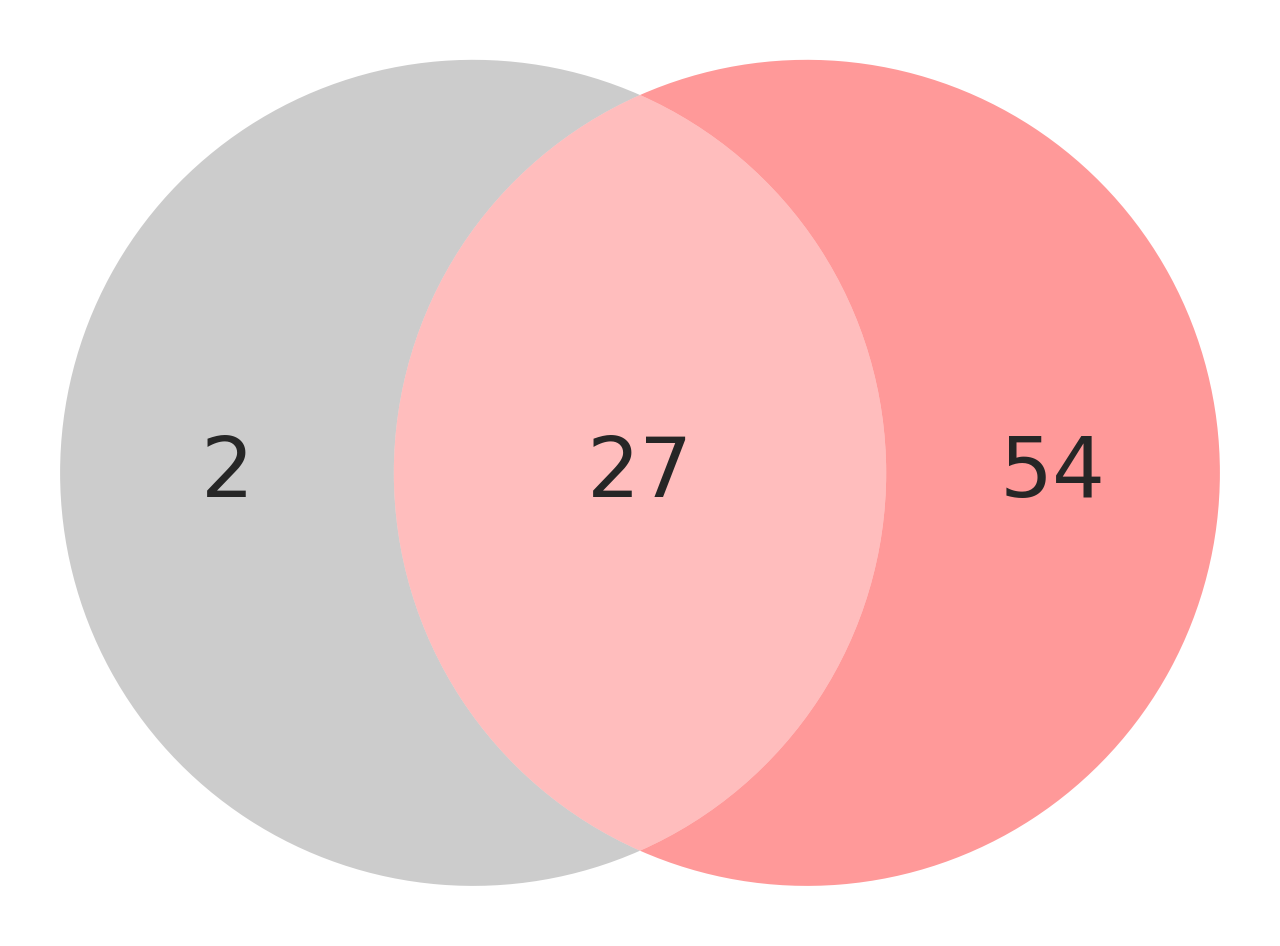

In [13]:
DualNetMResult.plot_Prior_Candidate_Venn('melanoma')

In [ ]:
cefcon_results = cefcon_GRN_model.get_cefcon_results(edge_threshold_avgDegree=8)
cefcon_results_dict[li] = cefcon_results